<a href="https://colab.research.google.com/github/ClaudioCazzetta/VISIONE-E-PERCEZIONE/blob/Claudio/CupObjectrondetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installazione ed import delle dipendenze

In [ ]:
!pip install opencv-python mediapipe

     |████████████████████████████████| 32.7 MB 1.5 MB/s 


In [ ]:
!git clone https://github.com/ClaudioCazzetta/VISIONE-E-PERCEZIONE.git

Cloning into 'VISIONE-E-PERCEZIONE'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 1), reused 15 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [ ]:
import cv2
import mediapipe as mp

Setup di mediapipe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron

Caricare un'immagine 2D di una tazza dal drive






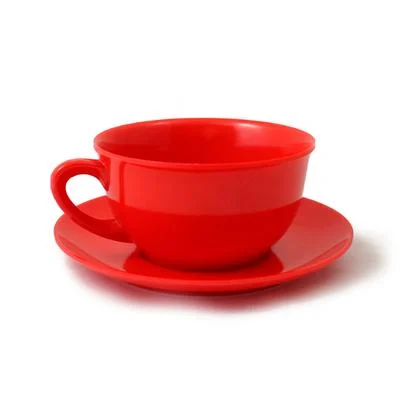

-1

In [ ]:
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/VISIONE-E-PERCEZIONE/media/tazza1.jpg")
cv2_imshow(image)
cv2.waitKey(0)

Immagine1: "/content/VISIONE-E-PERCEZIONE/media/tazza2.jpg"

Immagine2: "/content/VISIONE-E-PERCEZIONE/media/tazza5.jpg"

Detection e tracciamento

In [ ]:
with mp_objectron.Objectron(static_image_mode=True,
                            max_num_objects=2,
                            min_detection_confidence=0.5,
                            model_name='Cup') as objectron:
  
    image = cv2.imread("/content/VISIONE-E-PERCEZIONE/media/tazza1.jpg")
    # Conversione dell'immagine BGR a RGB e processamento con MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Disegnare landmarks della box.
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation,
                           detected_object.translation)
      cv2.imwrite('/tmp/annotated_image' + '.png', annotated_image)

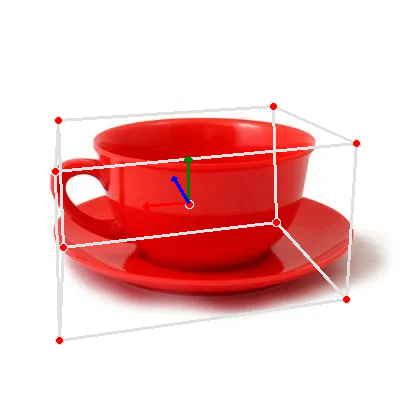

In [ ]:
cv2_imshow(annotated_image)